# Mines vs. Rocks
**This model distinguishes between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.**

## Data
The data set contains signals obtained from a variety of different aspect angles for the cylinder and the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. 

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).

Data Source: https://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/sonar.csv")

In [3]:
df.head()

Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

   Freq_10  ...  Freq_52  Freq_53  Freq_54  Freq_55  Freq_56  Freq_57  \
0   0.2111  ...   0.0027   0.0065   0.0159   0.0072   0.0167   0.0180   
1   0.2872  ...   0.0084   0.0089   0.0048   0.0094   0.0191   0.0140   
2   0.6194  ...   0.0232   0.0166   0.0095   0.0180   0.0244   0.0316   
3   0.1264  ...   0.0121   0.0036   0.0150   0.0085   0.0073   0.0050   
4   0.4459  ...   0.0031   0.0054   0.0105   0.0110   0.0015   0.0072   

   Freq_58  Freq_59  Freq_60  Label  
0   0.0084   0.0090   0.0032      R  
1   0.0049   0.0052   0.0044      R  
2   0.0164   0.0095   0.0078      R  
3   0.0044   0.0040   0.0117      R  
4   0.0048   0.0107   0.0094      R  

[5 rows x 61 columns]

### Exploratory Data Analysis (EDA)

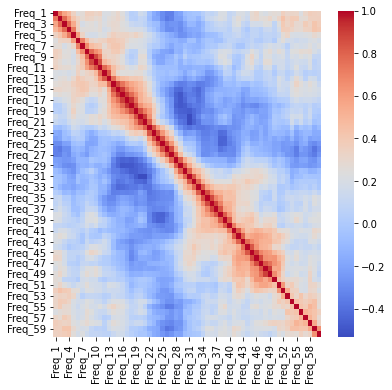

In [4]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), cmap="coolwarm");

**We map labels to 0 and 1 and find the top 5 correlated frequencies with the target feature.**

In [5]:
df["Target"] = df["Label"].map({"R": 0, "M": 1})

In [6]:
df.corr()["Target"].abs().nlargest(6)

Target     1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

## Machine Learning


### Train|Test Split
**We split the data for a cross validation with a 90% train size.**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(["Label", "Target"], axis=1)
y = df["Label"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
pipe = Pipeline(operations)

In [12]:
k_values = np.arange(1, 30)
param_grid = {"knn__n_neighbors": k_values}
grid_knn = GridSearchCV(pipe, param_grid=param_grid, scoring="accuracy", cv=5)

In [13]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

In [14]:
grid_knn.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [15]:
grid_knn.cv_results_["mean_test_score"]

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

In [16]:
accuracies = 100 * grid_knn.cv_results_["mean_test_score"]

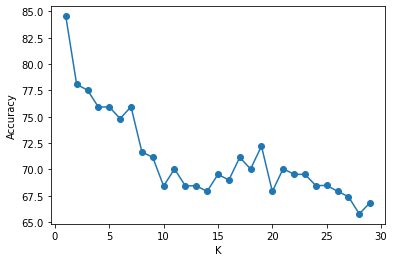

In [17]:
plt.plot(k_values, accuracies, "o-")
plt.xlabel("K")
plt.ylabel("Accuracy");

### Performance Evaluation

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
y_pred = grid_knn.predict(X_test)

In [20]:
confusion_matrix(y_test, y_pred)

array([[12,  1],
       [ 1,  7]])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

